# Домашнее задание 4 - Градиентный спуск 1 | Василенко Егор, Э-2209

## Условие задания

Реализовать в python метод градиентного спуска для одной и двух переменных, как в примерах выше. Для примера 1 построить график сходимости. Реализовать метод наискорейшего спуска в python или WM.

## Импорт библиотек

In [103]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mplcyberpunk

In [104]:
plt.style.use('cyberpunk')

## Градиентный спуск с фиксированным шагом

### С одной переменной

In [105]:
# Функция
def f1(x):
    return 100 + 7 * x**2

# Градиент функции
def df1(x):
    return 14 * x

In [106]:
# Функция для градиентного спуска с одной переменной
def gradient_descent_1d(f, df, x0, learning_rate=0.1, tol=1e-6, max_iter=50):
    x = x0                # Начальное значение
    path = [x]            # Сохраняем начальную точку для последующего построения траектории
    i = 0

    # Продолжаем цикл, покая не превысим max_iter.
    while i < max_iter:
        grad = df(x)                     # Вычисляем градиент в текущей точке
        x_new = x - learning_rate * grad # Обновляем x по правилу: x_new = x - шаг * градиент
        path.append(x_new)               # Записываем новую точку

        # Если изменение стало меньше заданного порога, считаем, что сходимость достигнута
        if abs(x_new - x) < tol:
            print(f"Остановка на итерации {i}: |x_new - x| = {abs(x_new - x)}")
            break

        x = x_new  # Переход к следующей итерации
        i += 1     # Увеличиваем счётчик

    return x, path

In [107]:
# Запуск алгоритма для одномерной функции.
x0_1d = 7.0  # Начальная точка
_, path_gd_1d = gradient_descent_1d(f1, df1, x0_1d, learning_rate=0.1)

x_vals = np.linspace(-10, 10, 400)
y_vals = f1(x_vals)

Остановка на итерации 18: |x_new - x| = 6.734508720128023e-07


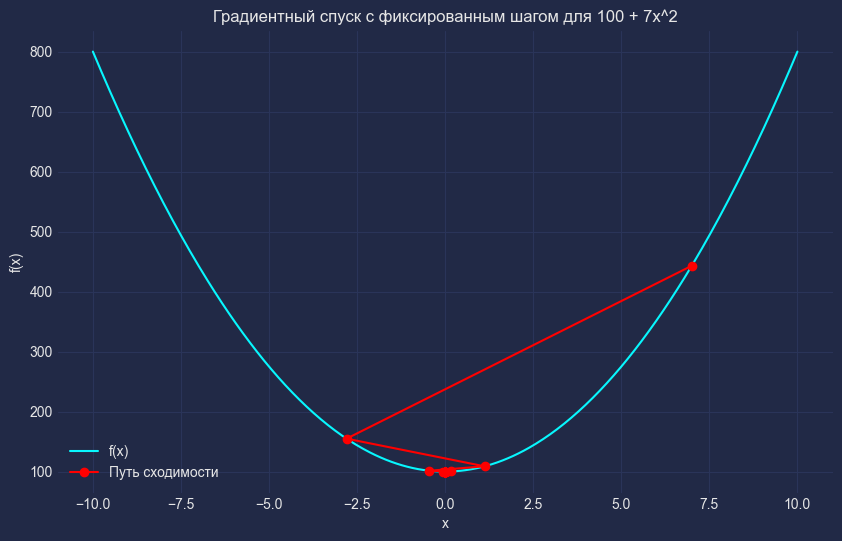

In [108]:
# График функции и траекторию спуска.
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)")
plt.plot(path_gd_1d, [f1(x) for x in path_gd_1d], 'ro-', label="Путь сходимости")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Градиентный спуск с фиксированным шагом для 100 + 7x^2")
plt.legend()
plt.grid(True)
plt.show()

### С двумя переменными

In [109]:
# Определяем функцию f(x, y) = (x-1)^2 + (y-2)^2, минимум в точке (1,2)
def f2(X):
    x, y = X
    return (x - 1)**2 + (y - 2)**2

# Градиент функции f2: вектор частных производных
def grad_f2(X):
    x, y = X
    return np.array([2 * (x - 1), 2 * (y - 2)])

In [110]:
# Градиентный спуск с фиксированным шагом для двух переменных
def gradient_descent_2d(f, grad, x0, learning_rate=0.1, tol=1e-6, max_iter=50):
    x = x0.copy()          # Начальное значение в виде вектора
    path = [x.copy()]
    i = 0

    # Цикл while до достижения максимального числа итераций
    while i < max_iter:
        g = grad(x)
        x_new = x - learning_rate * g
        path.append(x_new.copy())

        # Проверяем сходимость по евклидовой норме разности
        if np.linalg.norm(x_new - x) < tol:
            print(f"Остановка на итерации {i}: ||x_new - x|| = {np.linalg.norm(x_new - x)}")
            break

        x = x_new
        i += 1

    return x, path

In [111]:
x0_2d = np.array([7.0, 7.0])  # Начальная точка
_, path_gd_2d = gradient_descent_2d(f2, grad_f2, x0_2d, learning_rate=0.1)

x_range = np.linspace(-10, 10, 400)
y_range = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = (X - 1)**2 + (Y - 2)**2

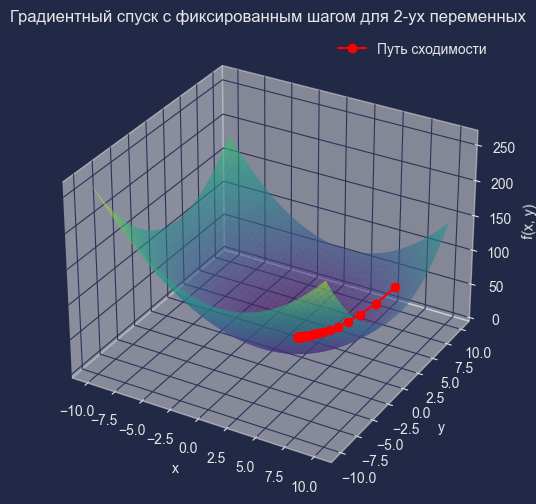

In [112]:
# 3D-график поверхности и траекторию спуска
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')

path_gd_2d = np.array(path_gd_2d)
ax.plot(path_gd_2d[:, 0], path_gd_2d[:, 1],
        [f2(point) for point in path_gd_2d], 'ro-', label="Путь сходимости")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Градиентный спуск с фиксированным шагом для 2-ух переменных")
ax.legend()
plt.show()

## Наискорейший градиентный спуск

### Для одной переменной

In [113]:
def steepest_descent_1d(f, df, x0, tol=1e-6, max_iter=50):
    x = x0              # Начальная точка
    path = [x]
    i = 0

    while i < max_iter:
        grad = df(x)
        alphas = np.linspace(0, 1, 100)
        fvals = [f(x - alpha * grad) for alpha in alphas]
        # Выбираем значение alpha, минимизирующее функцию
        alpha_opt = alphas[np.argmin(fvals)]
        x_new = x - alpha_opt * grad
        path.append(x_new)

        # Если изменение меньше заданного порога, завершаем цикл.
        if abs(x_new - x) < tol:
            print(f"Остановка на итерации {i}: |x_new - x| = {abs(x_new - x)}")
            break

        x = x_new
        i += 1

    return x, path

In [114]:
x0_1d = 7.0  # Начальная точка
_, path_sd_1d = steepest_descent_1d(f1, df1, x0_1d)

x_vals = np.linspace(-7, 7, 400)
y_vals = f1(x_vals)

Остановка на итерации 4: |x_new - x| = 4.1220199942280547e-08


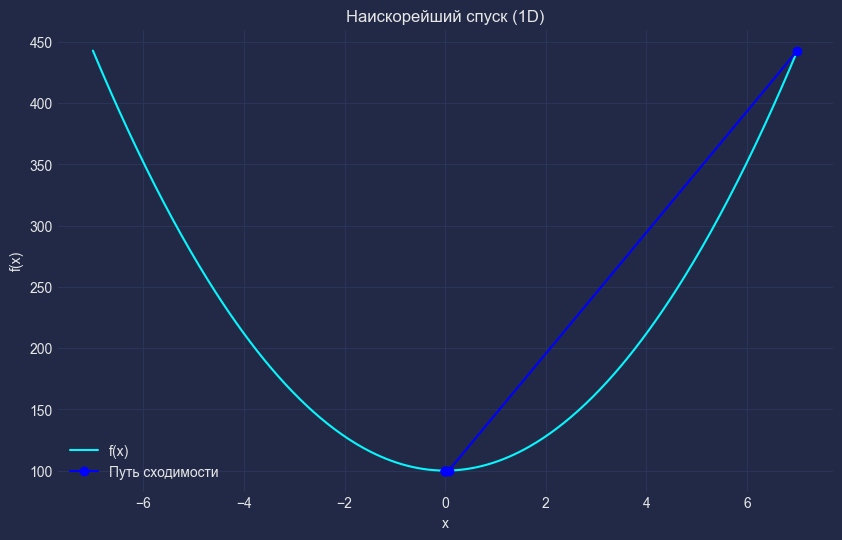

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)")
plt.plot(path_sd_1d, [f1(x) for x in path_sd_1d], 'bo-', label="Путь сходимости")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Наискорейший спуск (1D)")
plt.legend()
plt.grid(True)
plt.show()

### Для двух переменных

In [116]:
# Функция наискорейшего спуска для двух переменных: поиск оптимального шага для векторного спуска
def steepest_descent_2d(f, grad, x0, tol=1e-6, max_iter=50):
    x = x0.copy()
    path = [x.copy()]
    i = 0

    while i < max_iter:
        g = grad(x)
        alphas = np.linspace(0, 1, 100)
        fvals = [f(x - alpha * g) for alpha in alphas]
        # Выбираем оптимальное значение шага.
        alpha_opt = alphas[np.argmin(fvals)]
        x_new = x - alpha_opt * g
        path.append(x_new.copy())

        # Если изменение по норме меньше порога, останавливаем цикл
        if np.linalg.norm(x_new - x) < tol:
            print(f"Остановка на итерации {i}: ||x_new - x|| = {np.linalg.norm(x_new - x)}")
            break

        x = x_new
        i += 1

    return x, path

In [117]:
# Запуск алгоритма для двумерной функции
x0_2d = np.array([7.0, 7.0])  # Начальная точка
_, path_sd_2d = steepest_descent_2d(f2, grad_f2, x0_2d)

x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = (X - 1)**2 + (Y - 2)**2

Остановка на итерации 4: ||x_new - x|| = 8.048501323102482e-08


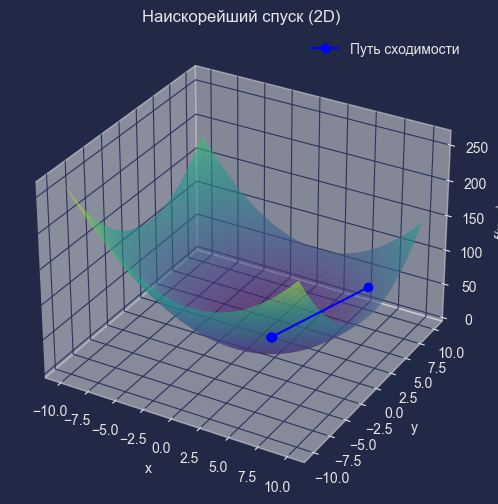

In [118]:
# 3D-график поверхности и траектория наискорейшего спуска
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')

path_sd_2d = np.array(path_sd_2d)
ax.plot(path_sd_2d[:, 0], path_sd_2d[:, 1],
        [f2(point) for point in path_sd_2d], 'bo-', label="Путь сходимости")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Наискорейший спуск (2D)")
ax.legend()
plt.show()